In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import cartopy
from bqplot import *
from matplotlib import animation as animation
import ipywidgets
import geopandas as gp

In [3]:
array_vals = pd.read_csv("data-readonly/transportable_array/data_tohoku_norm_transpose.csv", header=None)

In [4]:
## This code comes from Prof Turk. Translates our 4 hour time period into the time of day between 2:46pm and 6:46pm. 
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)

In [5]:
date_range = pd.date_range("2:46PM", "6:46PM", freq="1s")

In [6]:
# Now bringing in longitude and latitudes of stations
locations = pd.read_csv("/srv/nbgrader/data/transportable_array/location.txt",
                        delimiter="\t", names =["longitude", "latitude", "a", "b"])
del locations["a"], locations["b"]

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


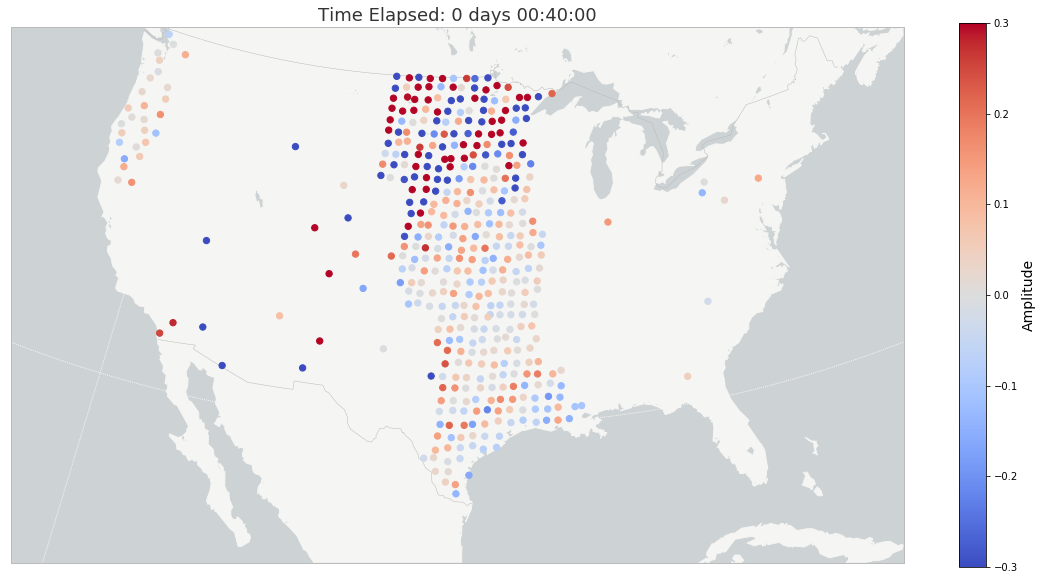

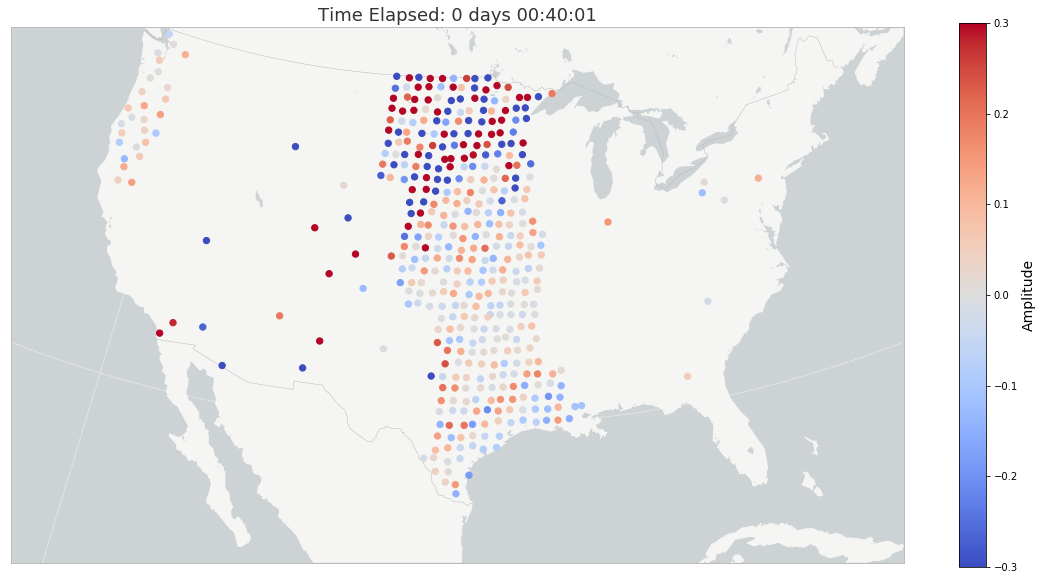

In [7]:
# This code creates the graphs that will serve as the foundation for our video.
# A Lambert Conformal basemap is inserted, and we center on US. 
# Stations are plotted by longitude and latitude. 
# Color is used to indicate the seismic activity. A diverging colormap is chosen to indicate positive and negative values.
# The min and max on the color scale are set to include all values in the dataset that are within two standard deviations of the mean. 
# The neutral, central color is set at "0". 
# Several for loops are shown in comments.
#   1. One version was used to run only 1-5 frames, created for speed when testing.
#   2. A second was used to create images for ALL times in the data set for an initial demo video. 
#   3. The third was used for our second, and final video, applying improvements from our first draft. Here, we limited to a one hour time frame, and added to aesthetics.  

# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#f5f5f3'
border_color = '#bbbbbb'
meridian_color = '#f5f5f3'
marker_fill_color = '#0000ff'
marker_edge_color = 'None'


## Initial loop for testing 1 - 5 frames at a time. Leaving this on for grading because it is ideal for testing environments. Creates 2 images, as it is currently set. 
for i, d in enumerate(date_range[(40*60):(40*60+2)] - date_range[0]):

## Original movie created from  all times in the data set. After careful review included a more limited time frame in the final video. See below.
## for i, d in enumerate(date_range - date_range[0]):
    
## Final video uses frames from 20 minutes to 80 minutes only. This is where we chose to focus our movie. 
##for i, d in enumerate(date_range[(20*60):(80*60+1)] - date_range[0]):

    # create the plot
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, facecolor='#ffffff', frame_on=False)
    ax.set_title('Transportable Array', fontsize=24, color='#333333')

    # draw the basemap and its features
    m = Basemap(width=5500000,height=3300000,
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=45.,lat_2=55,lat_0=37,lon_0=-98.)
    m.drawmapboundary(color=border_color, fill_color=water_color)
    m.drawcoastlines(color=coastline_color)
    m.drawcountries(color=border_color)
    m.fillcontinents(color=land_color, lake_color=water_color)
    m.drawparallels(np.arange(-90., 120., 30.), color=meridian_color)
    m.drawmeridians(np.arange(0., 420., 60.), color=meridian_color)
    
    color = array_vals.loc[d]
    
    # plt.figure()
    x, y = m(locations['longitude'].values, locations['latitude'].values)
    m.scatter(x, y, c = color, cmap = "coolwarm", s = 40, vmin = -0.3, vmax = 0.3, zorder=3)
    ax.set_title("Time Elapsed: %s"%d, fontsize = 18)
    cbar = plt.colorbar()
    cbar.set_label("Amplitude", fontsize = 14)
    
    # save figures for later download. 
    # If you take out the comments to turn this on, you need to set up a folder called "video_figs_final" to gather images.
    # fig_name = "video_figs_final/output_%06d.png"%i
    # plt.savefig(fig_name)
    

Once figures are saved to the folder called "video_figs_final", the files are zipped and downloaded so they can be transitioned to MEncoder to put them together into a movie. The code for zipping and downloading the files is in a separate notebook that is in the "video_figs_final" folder. But, for ease of access, here is the code that is included in that file: 

import tarfile

import glob

files = glob.glob("*.png")

tgz = tarfile.open("output_final.tgz", mode="w:gz")

for f in files[0:3600]:

    tgz.add(f)
    
tgz.close()